In [6]:
from fastai import *
from fastai.vision import *

In [7]:
folder = 'bedroom'
file = 'url_bedroom.txt'

In [8]:
folder = 'livingroom'
file = 'url_livingroom.txt'

In [9]:
folder = 'kitchen'
file = 'url_kitchen.txt'

In [10]:
folder = 'office'
file = 'url_office.txt'

In [11]:
folder = 'bathroom'
file = 'url_bathroom.txt'

In [12]:
path = Path('data/rooms')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [13]:
path.ls()


[PosixPath('data/rooms/models'),
 PosixPath('data/rooms/url_office.txt'),
 PosixPath('data/rooms/bathroom'),
 PosixPath('data/rooms/livingroom'),
 PosixPath('data/rooms/bedroom'),
 PosixPath('data/rooms/url_bedroom.txt'),
 PosixPath('data/rooms/url_livingroom.txt'),
 PosixPath('data/rooms/kitchen'),
 PosixPath('data/rooms/url_bathroom.txt'),
 PosixPath('data/rooms/url_kitchen.txt'),
 PosixPath('data/rooms/office')]

In [14]:
classes = ['kitchen', 'bedroom', 'bathroom', 'livingroom', 'office']

In [77]:
download_images(path/file, dest, max_pics=200)

Error http://www.homeybathroom.com/wp-content/uploads/2014/01/Bathroom-Rendering-.jpg HTTPConnectionPool(host='www.homeybathroom.com', port=80): Max retries exceeded with url: /wp-content/uploads/2014/01/Bathroom-Rendering-.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fc0717d9b38>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error https://cdn.freshome.com/wp-content/uploads/2015/05/smallbath7.jpg HTTPSConnectionPool(host='cdn.freshome.com', port=443): Max retries exceeded with url: /wp-content/uploads/2015/05/smallbath7.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fc071a660b8>: Failed to establish a new connection: [Errno -2] Name or service not known'))
Error http://www.imwanza.com/wp-content/uploads/2018/09/Agreeable-Home-Interior-Designers-Sofa-Remodelling-Or-Other-modern-bathroom-interior.jpg-Decor.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed c

In [49]:
download_images(path/file, dest, max_pics=200, max_workers=0)

Error https://www.costco.ca/wcsstore/CostcoCABCCatalogAssetStore/category-tiles/bedroom-amalia.jpg HTTPSConnectionPool(host='www.costco.ca', port=443): Read timed out. (read timeout=4)
Error https://www.costco.com/wcsstore/CostcoUSBCCatalogAssetStore/category-tiles/bedroom-collections.jpg HTTPSConnectionPool(host='www.costco.com', port=443): Read timed out. (read timeout=4)
Error https://www.homedepot.ca/content/dam/homedepot/images/shop-by-room/bedroom/br-intro-810x405.jpg HTTPSConnectionPool(host='www.homedepot.ca', port=443): Read timed out. (read timeout=4)
Error https://www.costco.ca/wcsstore/CostcoCABCCatalogAssetStore/category-tiles/bedroom-aurora.jpg HTTPSConnectionPool(host='www.costco.ca', port=443): Read timed out. (read timeout=4)
Error https://www.costco.ca/wcsstore/CostcoCABCCatalogAssetStore/category-tiles/bedroom-furniture-beds.jpg HTTPSConnectionPool(host='www.costco.ca', port=443): Read timed out. (read timeout=4)
Error https://www.homedepot.ca/content/dam/homedepot/i

In [16]:
for c in classes:
    print(c)
    print(path/c)
    verify_images(path/c, delete=True, max_size=500)

kitchen
data/rooms/kitchen


bedroom
data/rooms/bedroom


bathroom
data/rooms/bathroom


livingroom
data/rooms/livingroom


office
data/rooms/office


In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

                                  

In [18]:
data.classes

['bathroom', 'bedroom', 'kitchen', 'livingroom', 'office']

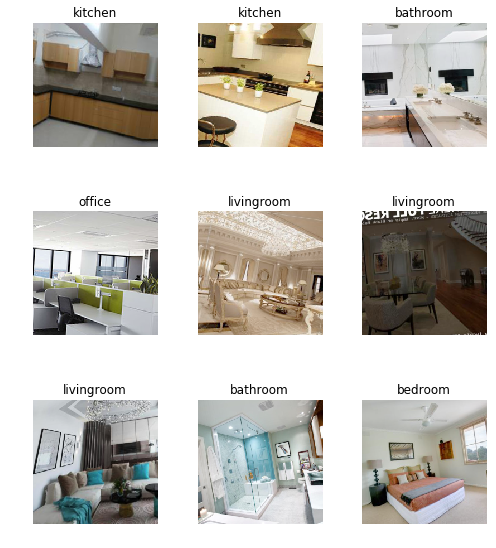

In [19]:
data.show_batch(rows=3, figsize=(7, 8))

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bathroom', 'bedroom', 'kitchen', 'livingroom', 'office'], 5, 736, 184)

In [23]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [99]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


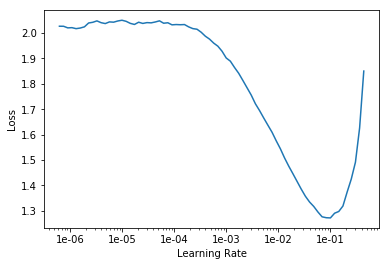

In [100]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(4, max_lr=slice(1e-4, 6e-4))


epoch,train_loss,valid_loss,error_rate
1,2.001324,1.470634,0.673913
2,1.672102,0.923922,0.353261
3,1.398886,0.753756,0.320652
4,1.237065,0.731479,0.315217


In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.705570,0.815308,0.266304
2,1.174614,0.477852,0.152174
3,0.919011,0.462654,0.163043
4,0.771421,0.463411,0.168478


In [25]:
learn.save('stage-1')

In [26]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (736 items)
[Category bathroom, Category bathroom, Category bathroom, Category bathroom, Category bathroom]...
Path: data/rooms
x: ImageItemList (736 items)
[Image (3, 250, 300), Image (3, 500, 333), Image (3, 500, 488), Image (3, 500, 333), Image (3, 500, 375)]...
Path: data/rooms;

Valid: LabelList
y: CategoryList (184 items)
[Category livingroom, Category bedroom, Category kitchen, Category livingroom, Category bedroom]...
Path: data/rooms
x: ImageItemList (184 items)
[Image (3, 333, 500), Image (3, 353, 500), Image (3, 360, 480), Image (3, 500, 373), Image (3, 500, 376)]...
Path: data/rooms;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  

In [27]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


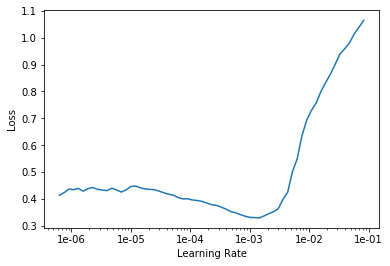

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(6, max_lr=slice(1e-5, 6e-4))

epoch,train_loss,valid_loss,error_rate
1,0.462177,0.447630,0.141304
2,0.398846,0.377667,0.135870
3,0.326762,0.266154,0.103261
4,0.270558,0.249256,0.086957
5,0.232081,0.243018,0.086957
6,0.193826,0.244239,0.086957
